<a href="https://colab.research.google.com/github/helena31415/SR_Enciclopedia/blob/main/lista03_Radiacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import numpy as np

Função útil

In [4]:
from datetime import datetime

def calcular_dia_juliano(dia_mes):
    """
    Calcula o dia juliano (1-365/366) a partir de uma data no formato 'dia/mês'.

    Args:
        dia_mes (str): Data no formato 'dia/mês' (ex: '25/12')

    Returns:
        int: O dia juliano correspondente
    """
    try:
        # Obter o dia e mês da string de entrada
        dia, mes = map(int, dia_mes.split('/'))

        # Criar um objeto datetime para o ano atual (poderia ser qualquer ano não bissexto/bissexto)
        # Vamos usar o ano atual para determinar se é bissexto automaticamente
        ano_atual = datetime.now().year
        data = datetime(ano_atual, mes, dia)

        # Calcular o dia juliano (dia do ano)
        dia_juliano = data.timetuple().tm_yday

        return dia_juliano

    except ValueError as e:
        print(f"Erro: Data inválida. Certifique-se de usar o formato 'dia/mês'. Detalhes: {e}")
        return None

# Exemplo de uso
if __name__ == "__main__":
    data_input = input("Digite a data no formato dia/mês (ex: 25/12): ")
    resultado = calcular_dia_juliano(data_input)

    if resultado:
        print(f"O dia juliano para {data_input} é: {resultado}")

Digite a data no formato dia/mês (ex: 25/12): 25/12
O dia juliano para 25/12 é: 359


## 1) O fluxo de energia solar que chega ao topo da atmosfera ilumina constantemente toda a metade da superfície terrestre que está voltada para o Sol. Imagine que toda a superfície da Terra fosse populada e que seus habitantes pudessem acender luzes artificiais a cada pôr-do-sol de maneira que nunca houvesse noite. Quantas lâmpadas de 100 watts seriam necessárias para fazer com que a metade não iluminada da Terra brilhasse tanto quanto a metade iluminada pelo Sol?
Obs.: Raio da Terra - 6370 km.


In [ ]:
# Calculando a área da Terra
raio = 6370000  # metros
areaTerra = 4 * math.pi * math.pow(raio, 2)
print(f"{areaTerra:.2e} m^2")
metadeAreaTerra = areaTerra/2
print(f"{metadeAreaTerra:.2e} m^2")

5.10e+14
2.55e+14


In [ ]:
# fluxo solar que chega em metade da Terra:
S = 1367 # cte solar em W/m^2
fluxoSolar = S * metadeAreaTerra
print(f"{fluxoSolar:.2e} W")

3.49e+17 W


In [ ]:
# como cada lâmpada teria 100 W, o nº necessário de lâmpadas seria:
N = fluxoSolar/100
print(f"{N:.2e} lâmpadas")

3.49e+15 lâmpadas


## 2) Determine a temperatura efetiva do sol (temperatura da fotosfera), considerando-o um corpo negro. Explique cada passo.

In [ ]:
# Primeiro, assumimos que o Sol se comporta como um Corpo Negro


In [ ]:
# Definindo as constantes conhecidas
S = 1367  # Solar constant (W/m^2): Energia solar recebida no topo da atmosfera terrestre por unidade de área.
sigma = 5.67e-8  # Constante de Stefan-Boltzmann (W/m^2 K^4)
r0 = 1.496e11  # Distância média Sol-Terra (m): Distância média entre o centro do Sol e o centro da Terra.
a_sol = 6.96e8  # Raio do Sol (m).

## pelo Princípio de Conservação de Energia, a energia emitida pelo sol deve permanecer a mesma a uma dada distância dele,
# Então se I_sol é a irradiância solar, I_sol * 4pi * a_sol^2 = S * 4pi * r0^2, ou seja,
# como pensamos o Sol como corpo negro, ele emite isotropicamente a radiação. dessa forma a energia que chega na superficie da esfera de raio solar é equivalente a energia que chega na esfera de raio r0.
# então, I_sol = (S * 4pi * r0^2) / (4pi * a_sol^2) = S * (r0^2 / a_sol^2)

# Passo 1: Calcular o termo (r0 / a_sol)^2
# A energia emitida pelo Sol se espalha sobre uma superfície esférica de raio r0.
# O fator (r0 / a_sol)^2 representa a diluição da energia solar à medida que ela se propaga pelo espaço.
# Esse termo surge da conservação de energia: a energia total emitida pelo Sol deve ser igual à energia
# interceptada por uma esfera de raio r0 centrada no Sol.
razao_raios_quadrado = (r0 / a_sol) ** 2

# Passo 2: Calcular T^4 usando a fórmula
# A Lei de Stefan-Boltzmann relaciona a emissão de energia de um corpo negro com sua temperatura:
# F_emissão = σ * T^4, onde F_emissão é o fluxo de energia emitido pela superfície do Sol.
# No entanto, o fluxo de energia medido na Terra (S) já inclui a diluição da energia pelo fator (r0 / a_sol)^2.
# Portanto, usamos S como base para calcular a emissão original do Sol e, consequentemente, sua temperatura.
T4 = (S / sigma) * razao_raios_quadrado

# Passo 3: Tirar a raiz quarta para obter T
# A temperatura efetiva do Sol (T_sol) é obtida tirando a raiz quarta de T^4.
# Essa operação é equivalente a elevar T^4 à potência 1/4.
T_sol = T4 ** 0.25

# Exibindo o resultado
print(f"A temperatura efetiva do Sol é aproximadamente {T_sol:.0f} K.")

A temperatura efetiva do Sol é aproximadamente 5777 K.


## 3) Considere uma sala de aula em forma de paralelepípedo com dimensões de 9 m x 3 m x 3 m. A temperatura inicial da sala é de 30°C, e há 5 pessoas, cada uma com altura de 1,70 m, que estão emitindo calor. O ar-condicionado, com potência de 5000 W, está programado para resfriar o ambiente até atingir a temperatura de 20°C. Nosso objetivo é calcular o tempo necessário para que a sala atinja o equilíbrio térmico a 20°C, após o ar-condicionado ser ligado. Observação: Usando a Lei de Stefan-Boltzmann, a potência líquida de radiação emitida por uma pessoa em uma sala com temperatura ambiente de 30°C é aproximadamente 38 W. Este é o calor perdido pela radiação. A contribuição total de calor (incluindo convecção e evaporação) será maior, por isso o valor típico usado em cálculos térmicos para uma pessoa em repouso é cerca de 100 W, pois inclui outras formas de troca de calor além da radiação.

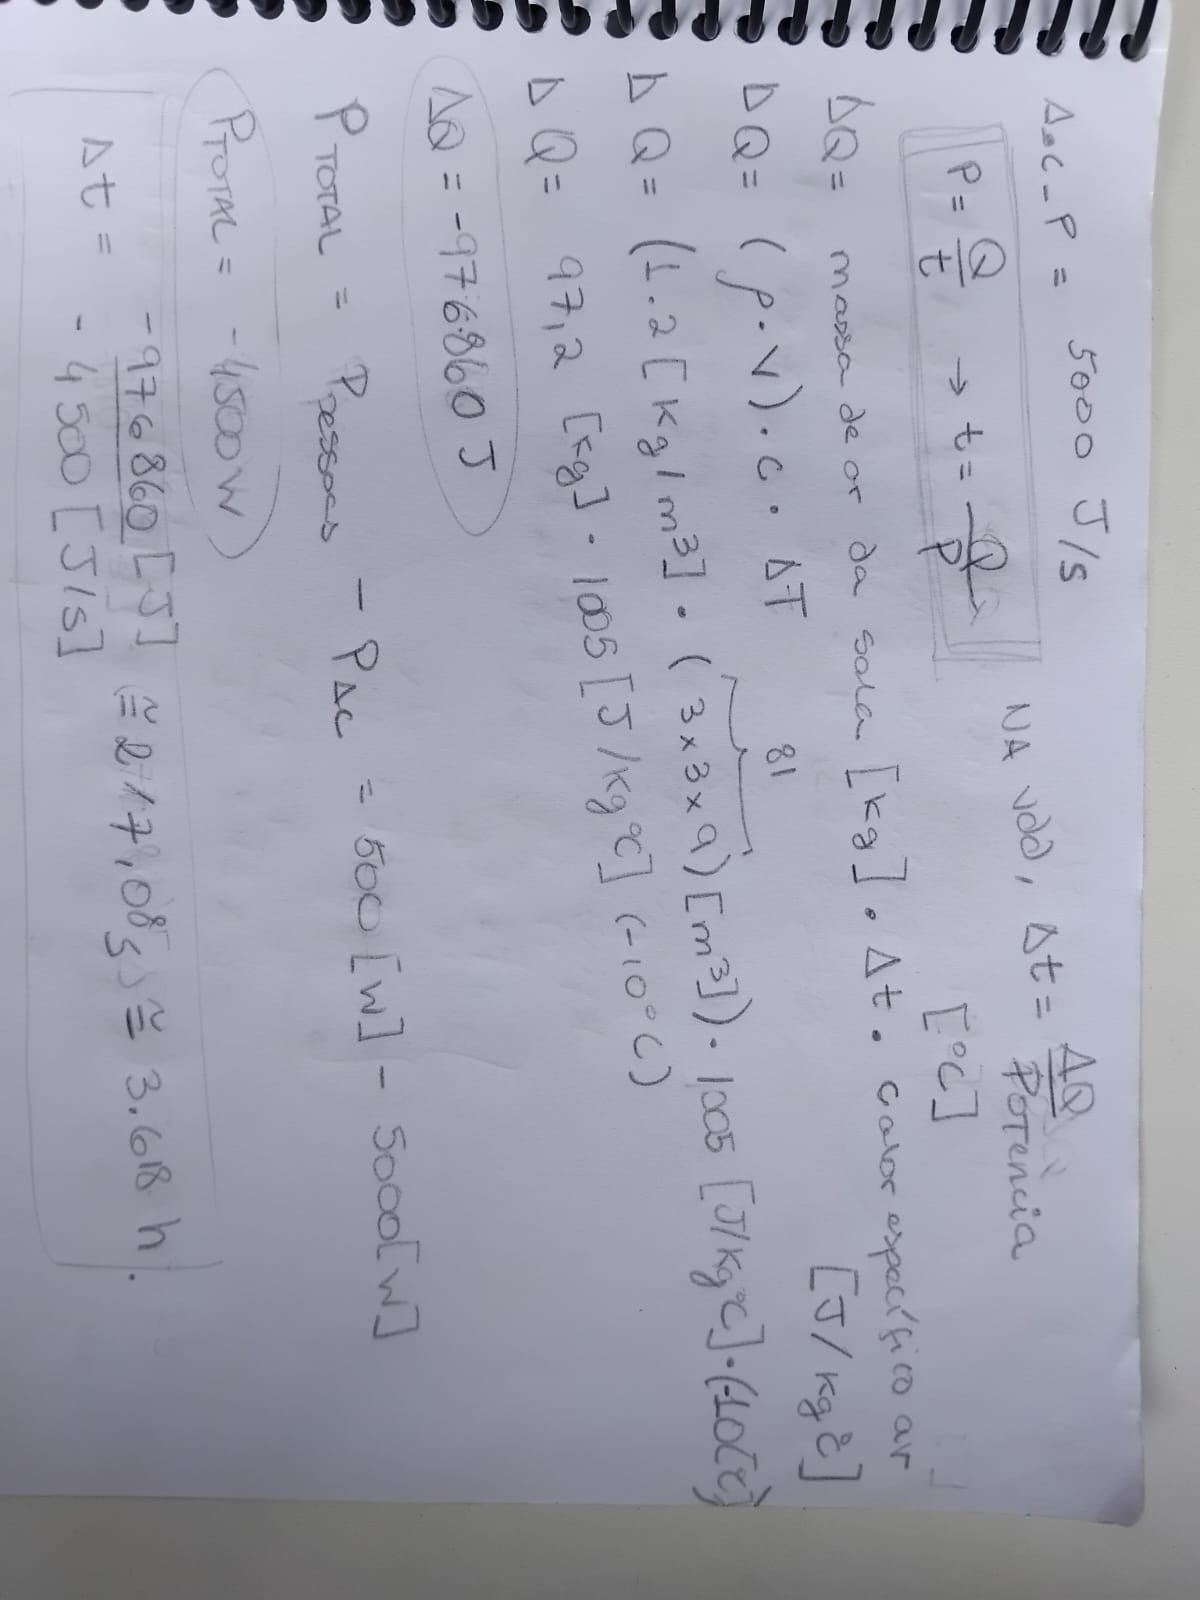

4) Considere um objeto esférico, como o discutido acima, com raio r=10cm e capacidade térmica C=1×10^3 J/K.
(a) Encontre uma expressão para a taxa de aquecimento dT/dt​ como uma função de T, quando T≠Te​ (temperatura de equilíbrio).
(b) Suponha que, após a temperatura atingir o equilíbrio, a radiação solar incidente seja repentinamente desligada — por exemplo, o objeto passa para a sombra de um planeta. Use sua solução da parte anterior para encontrar a temperatura T do objeto como função do tempo t. Ignore os efeitos da condutividade térmica finita.
(c) A partir de sua solução para (b), determine o tempo necessário para o objeto esfriar até 100K, 10K e 1K.


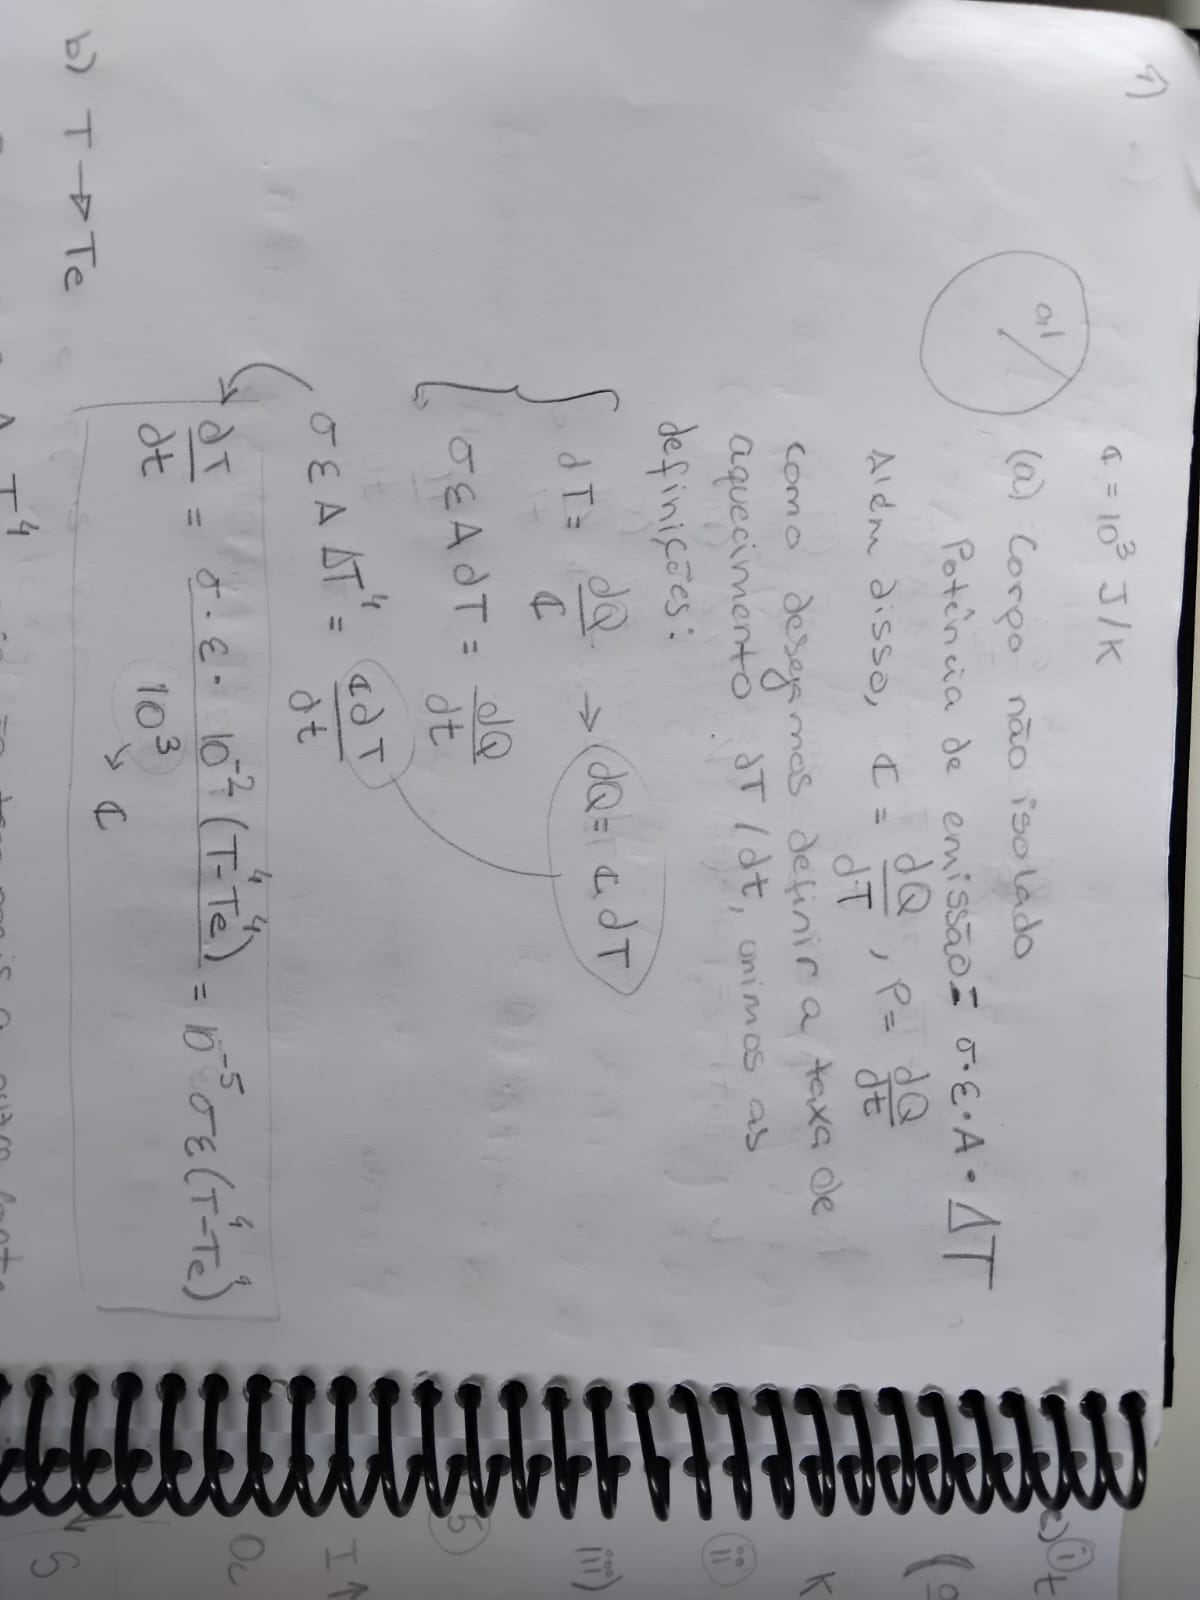

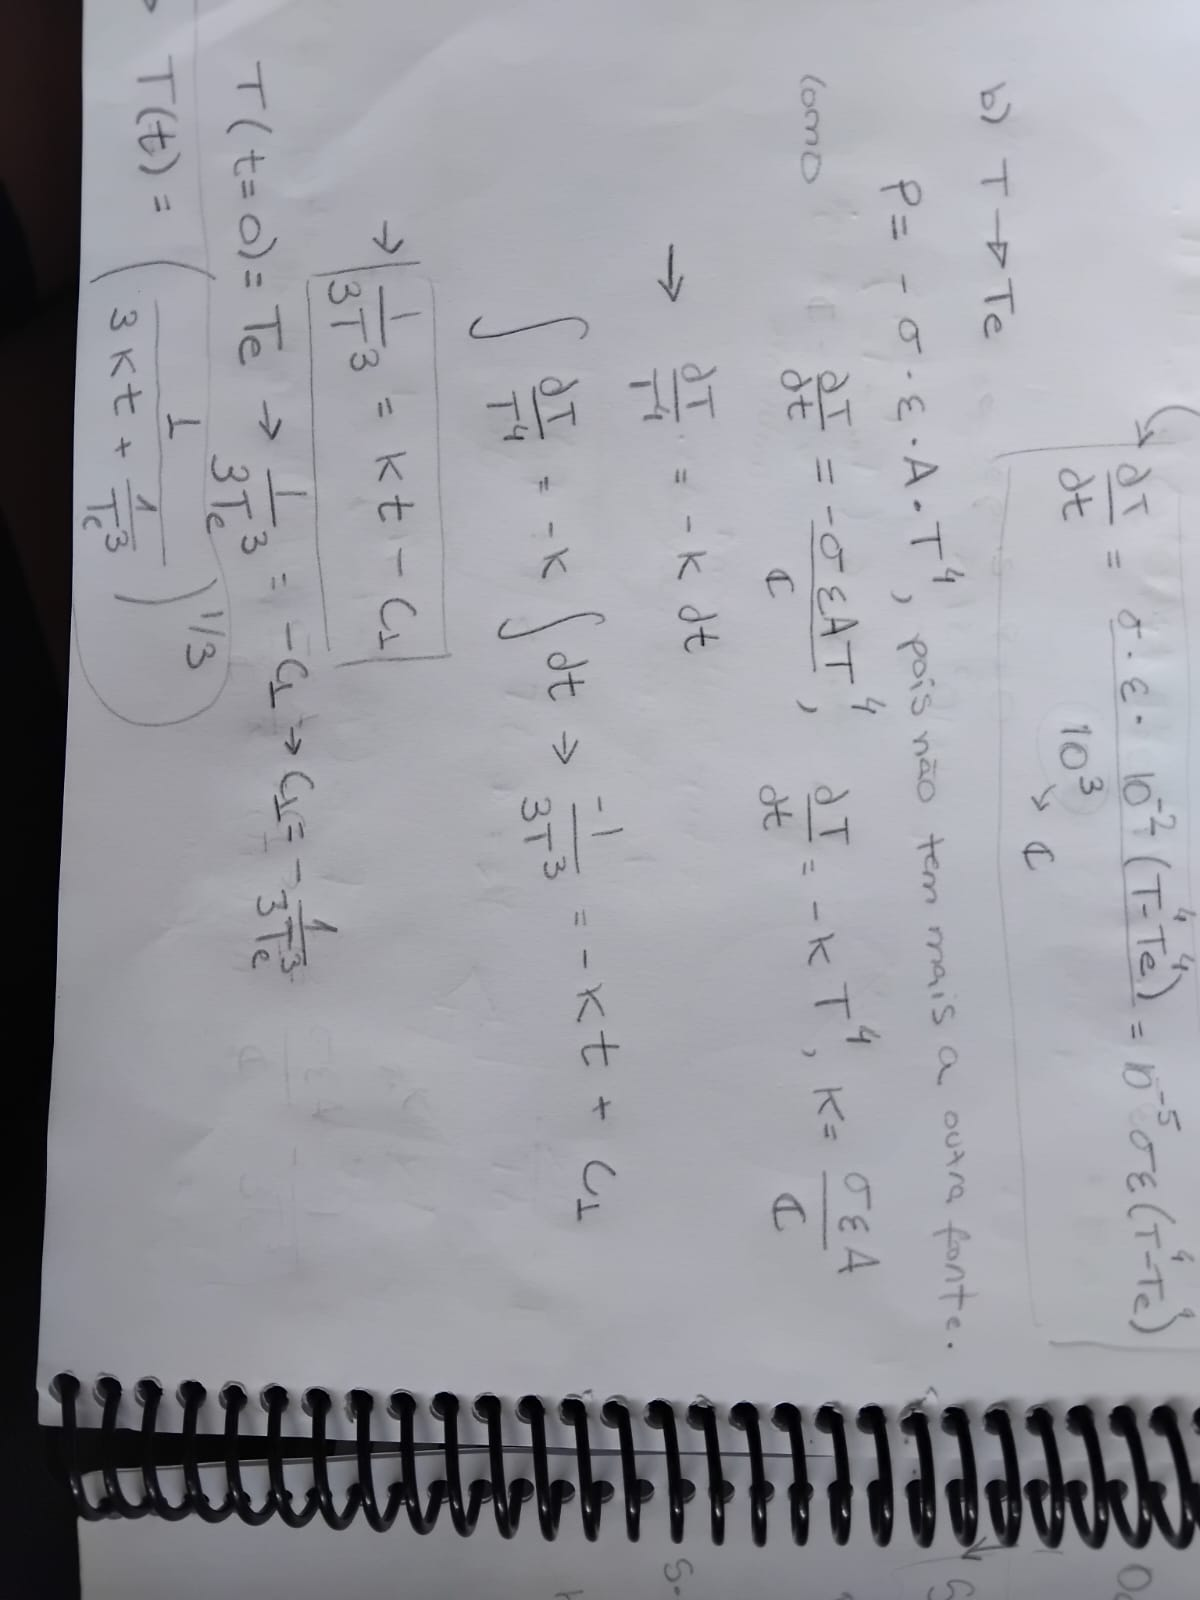

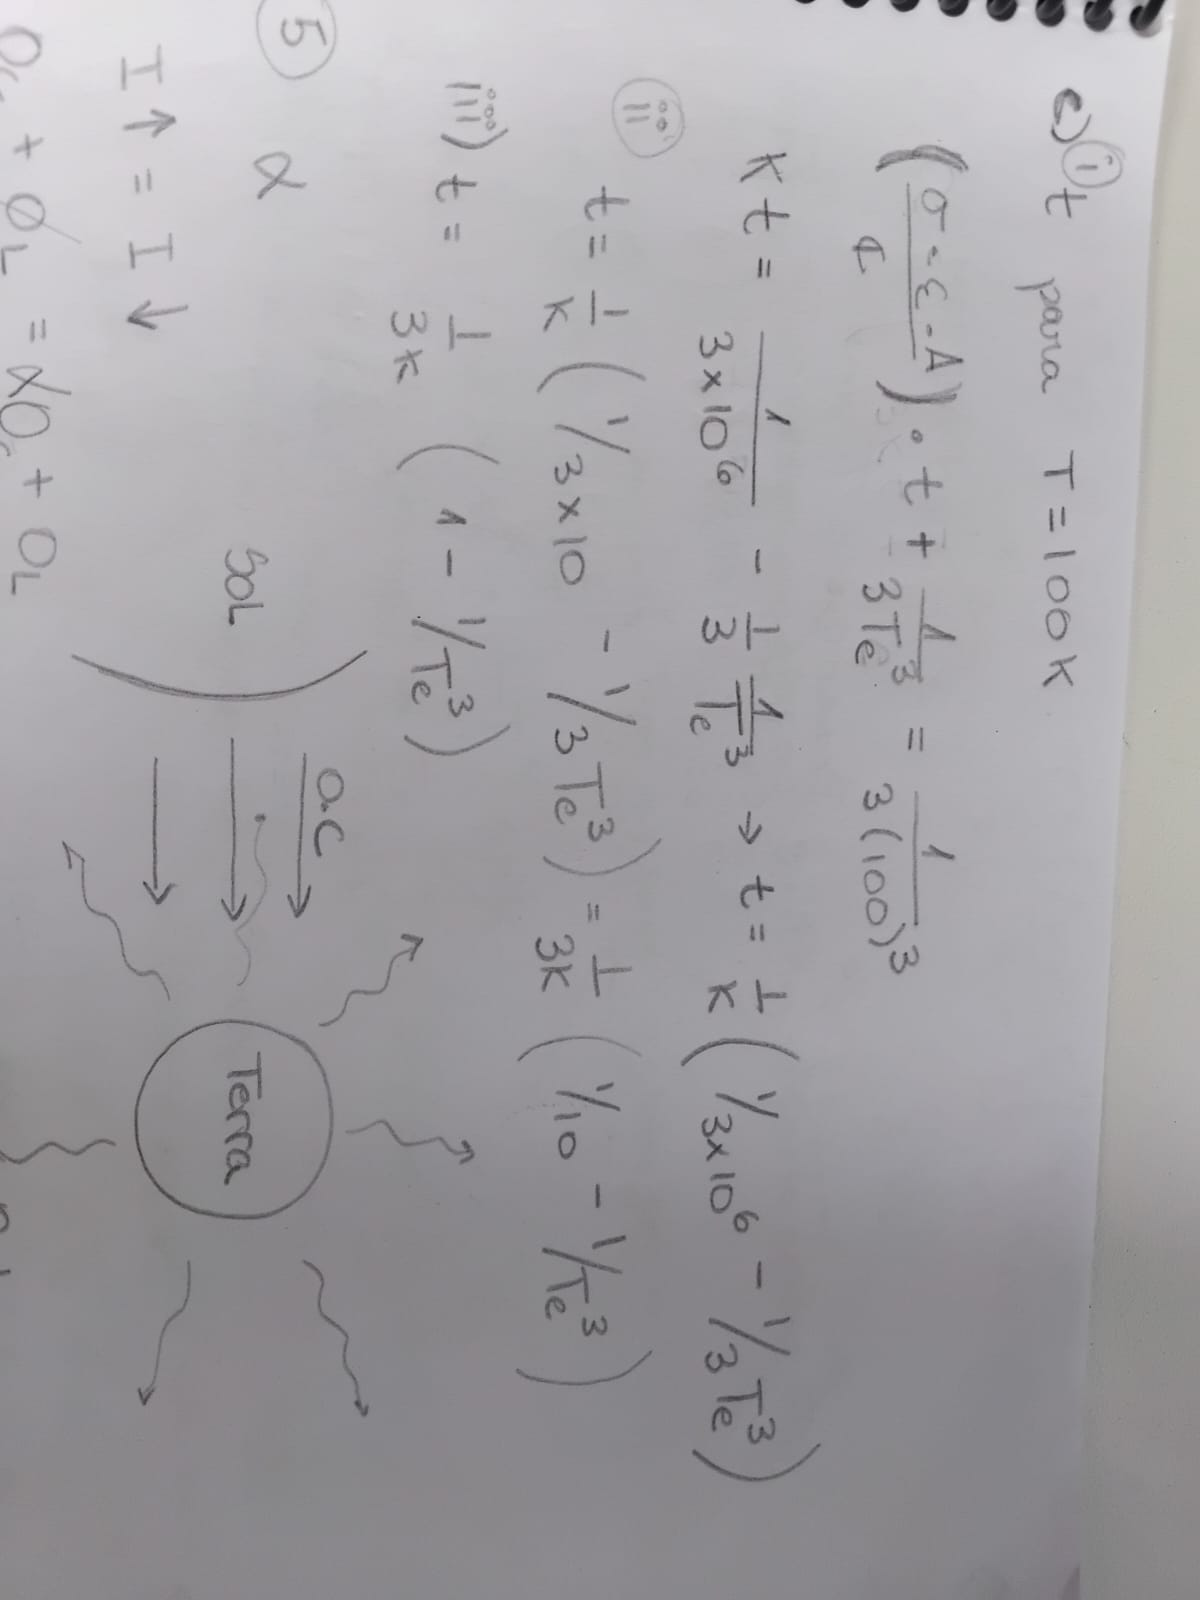

## 5) Admita que α é o albedo médio da terra e que o sistema terra-atmosfera está em equilíbrio para um longo período de tempo. Mostre que a temperatura de equilíbrio do sistema terra-atmosfera é:

## T = [(1-α)Isc / 4σ] ¼


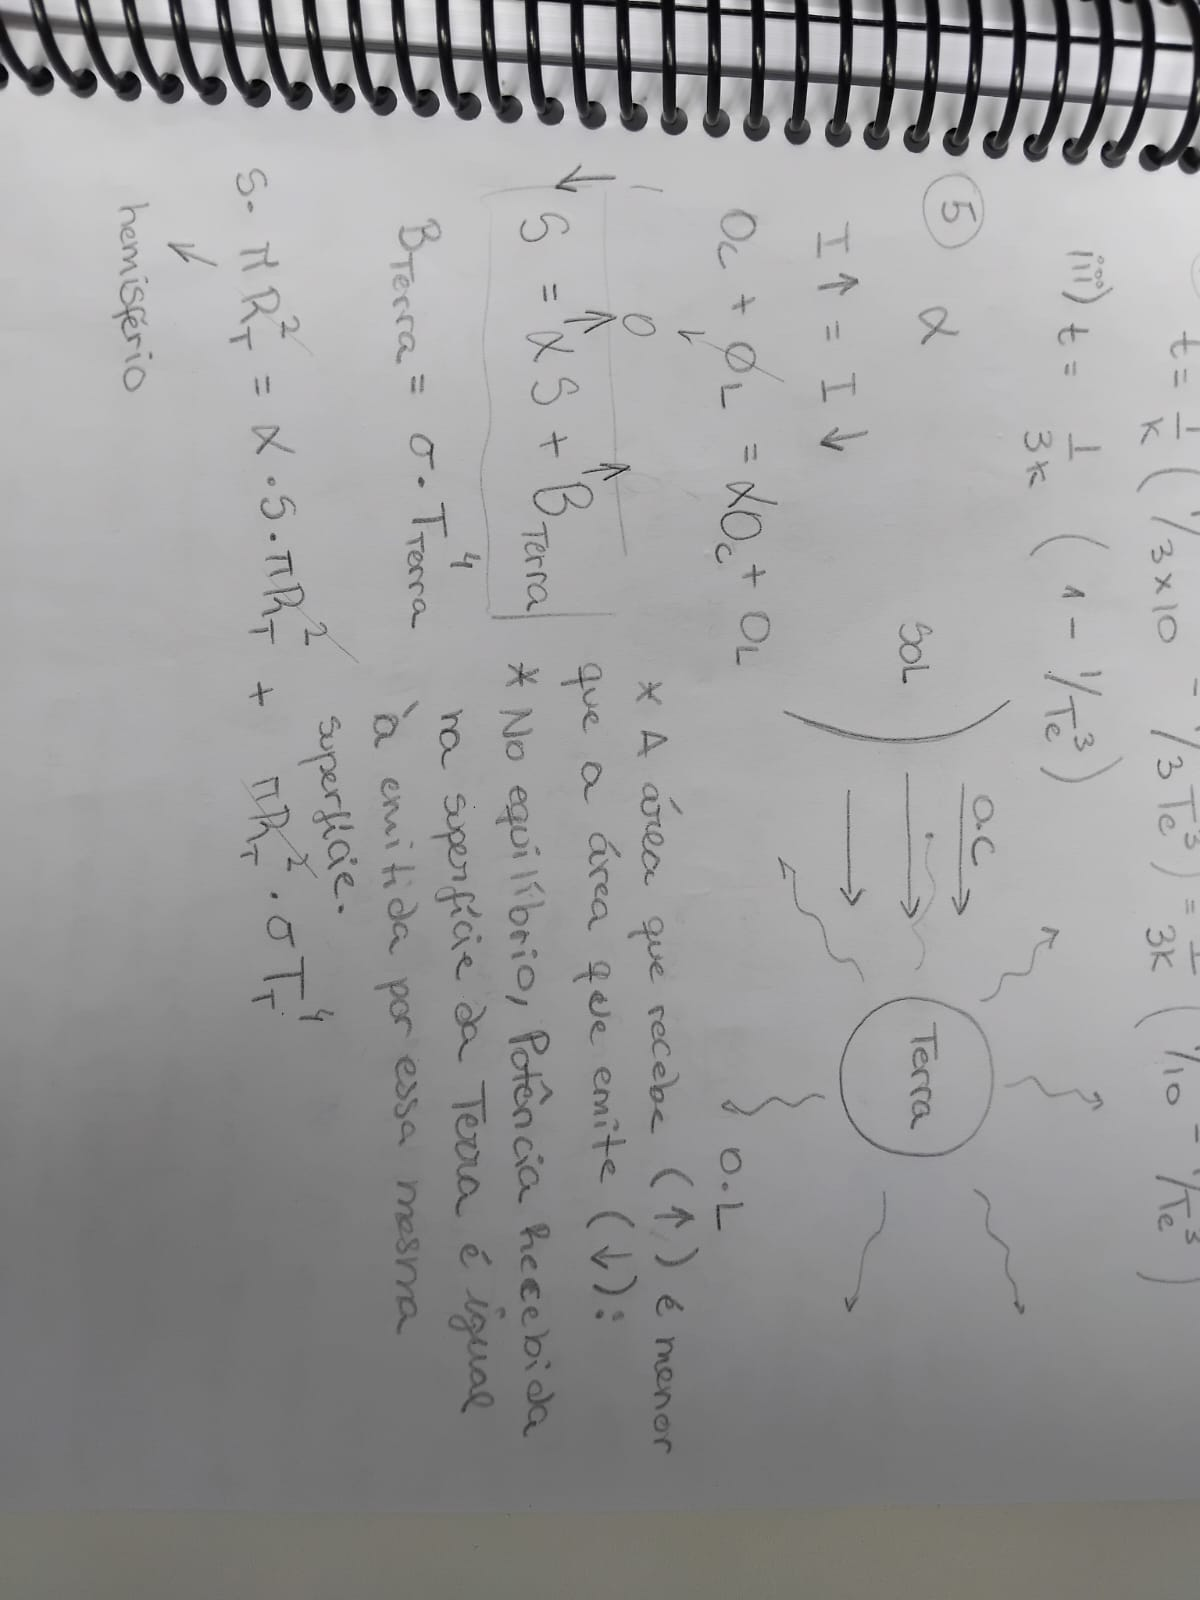

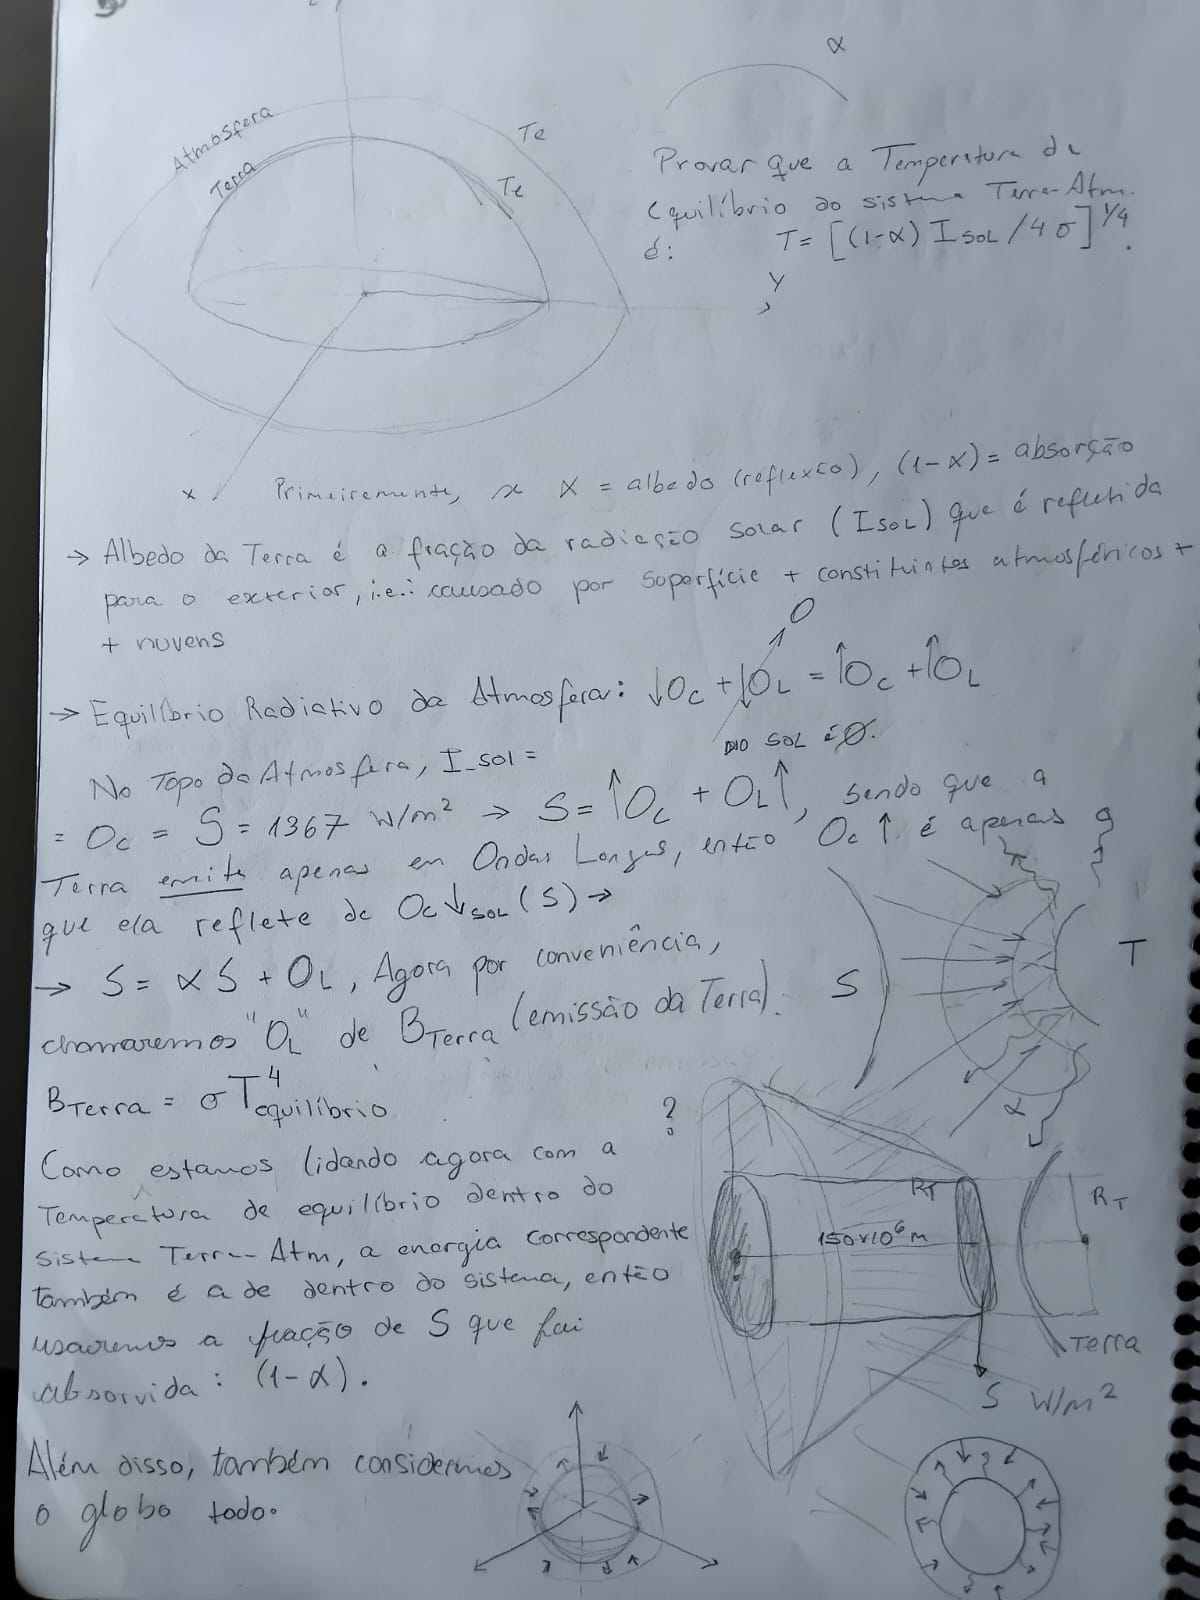

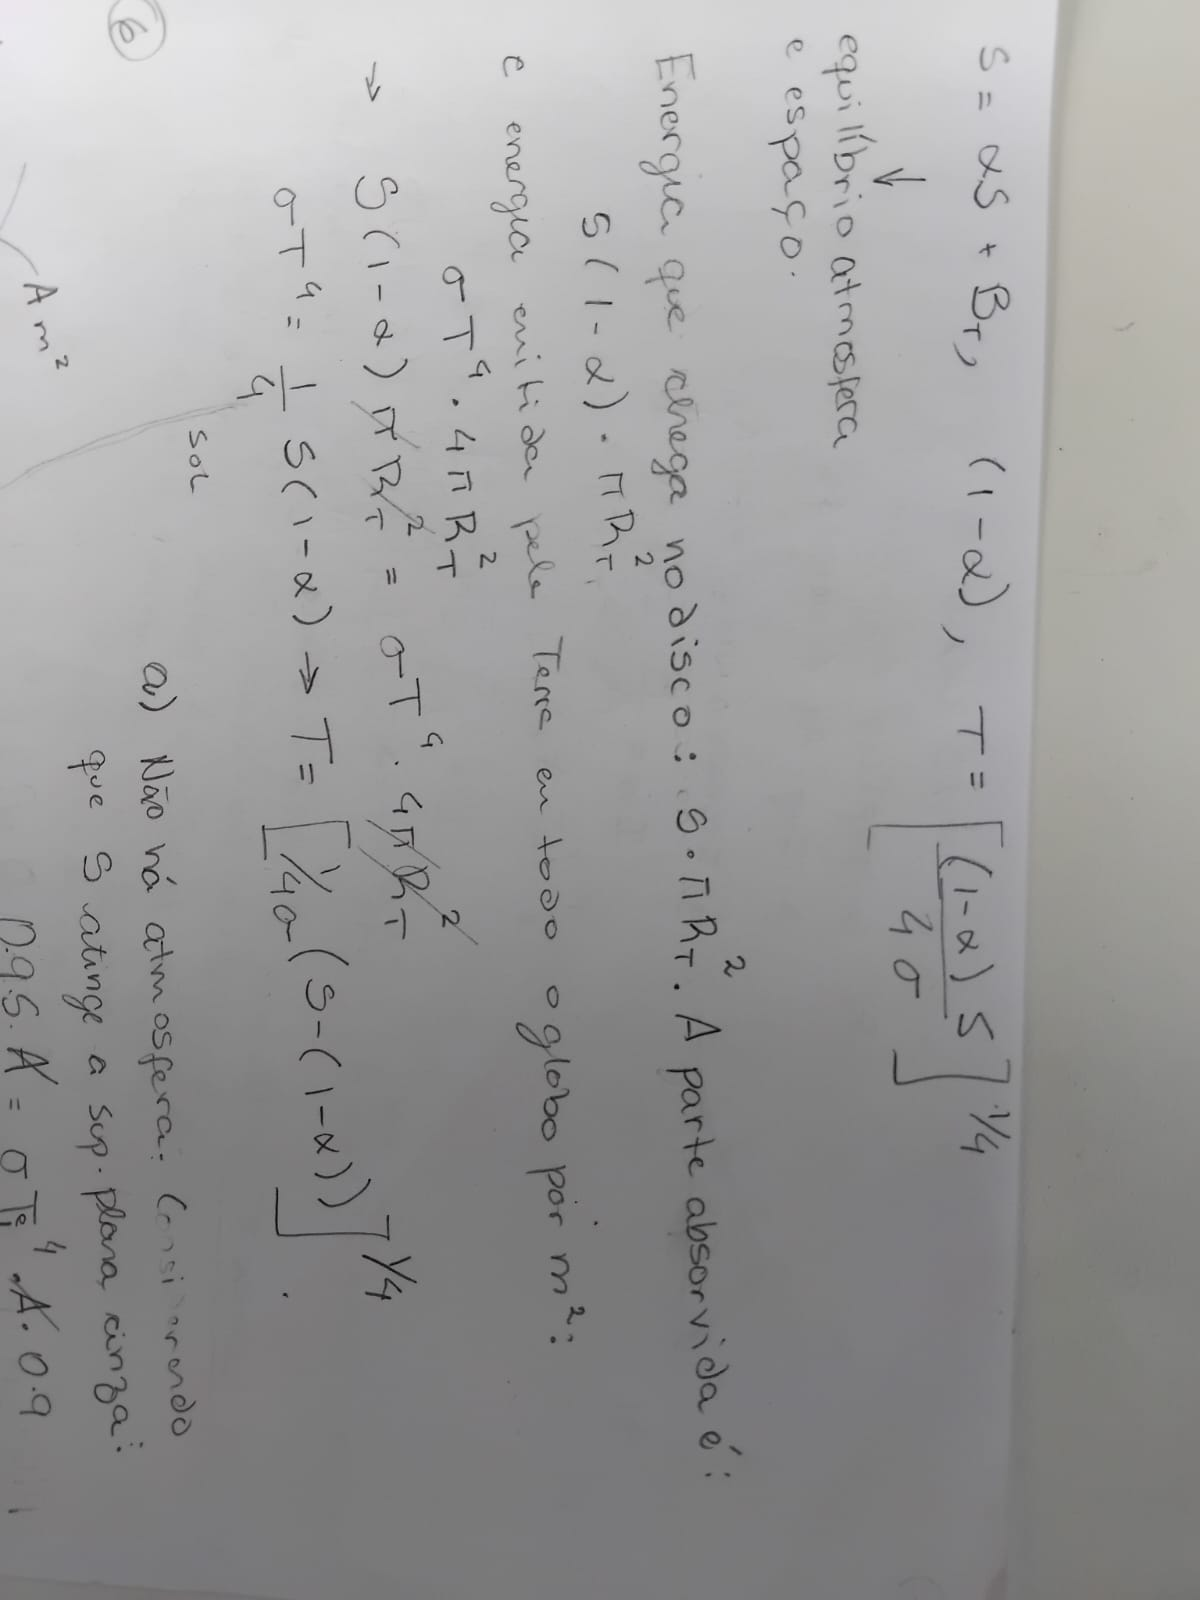

## 6) Uma superfície cinza completamente plana situada na superfície da lua, com uma absortividade de 0,9 está exposta aos raios solares diretos. Pergunta-se

Qual a temperatura de equilíbrio radiativo da superfície?

Se a temperatura real da superfície é 300 K, qual é a irradiância líquida (balanço entre a radiação que entra e sai) imediatamente acima da superfície?

Obs.: Como a lua não possui atmosfera, não haverá modificações na radiação solar que chega à superfície.


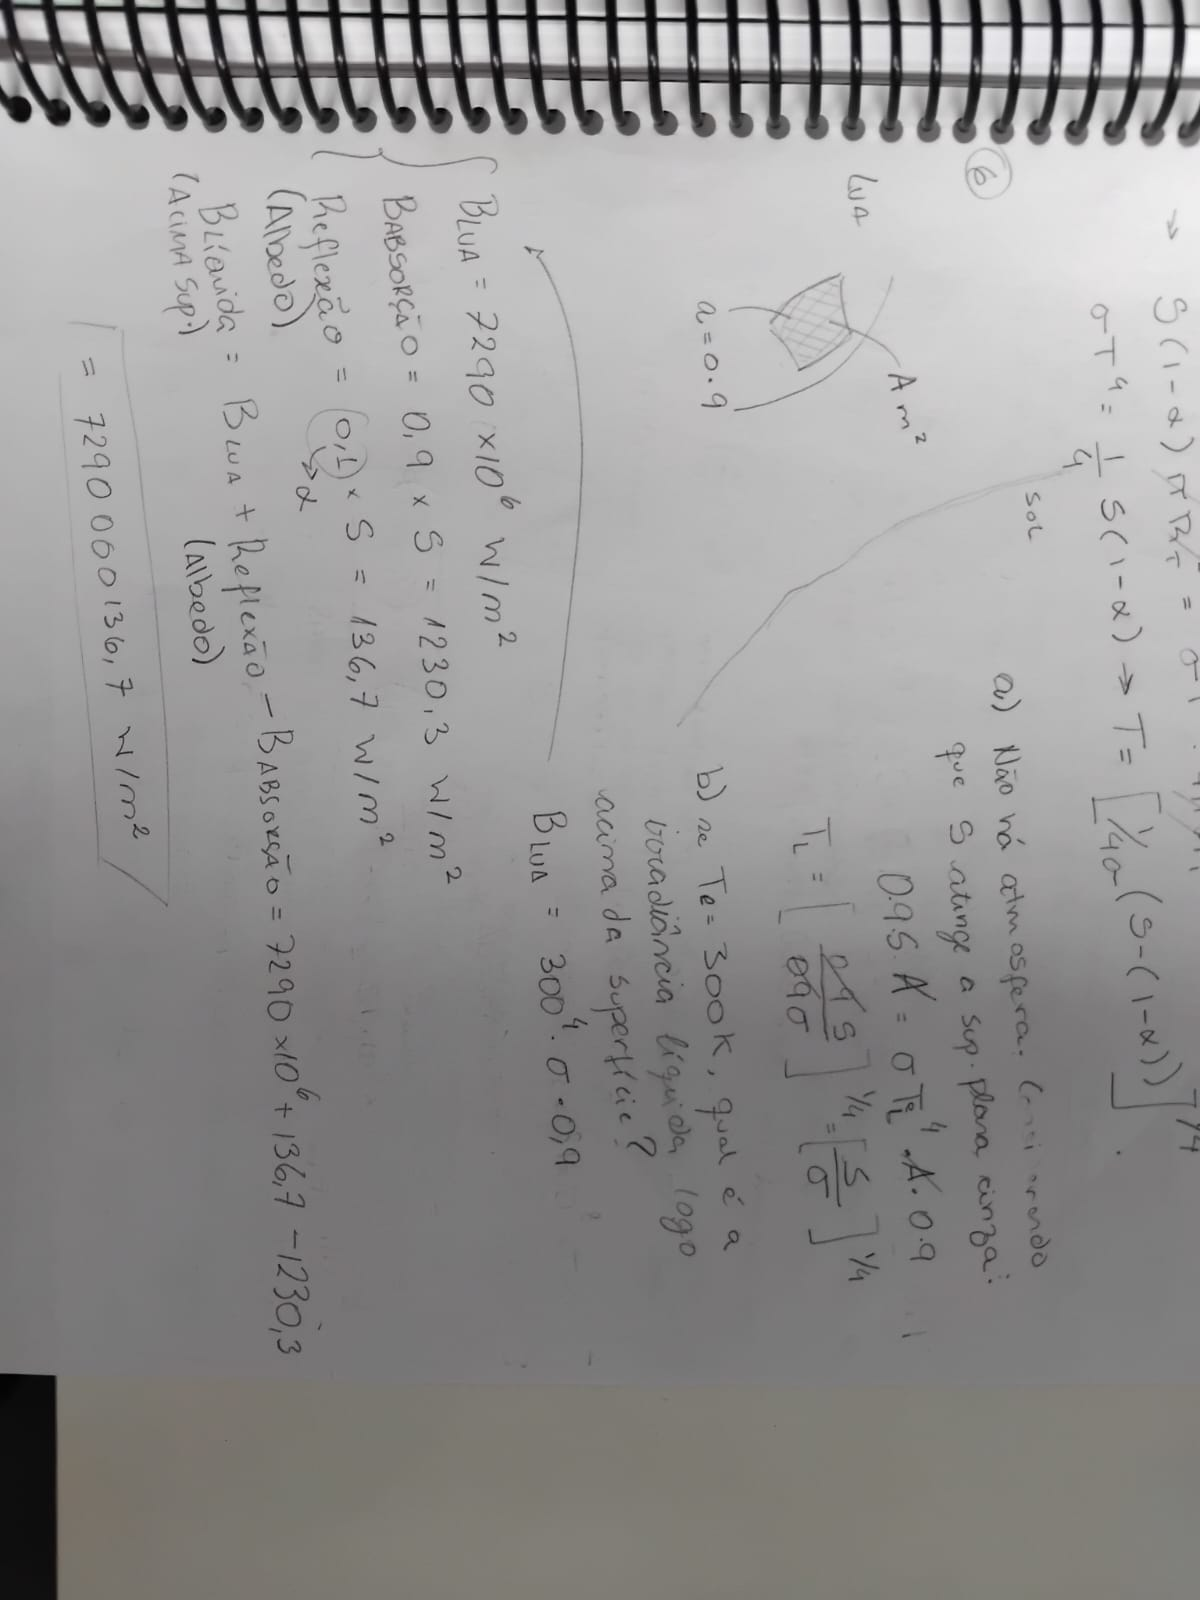

##7) Estimar a radiação solar extraterrestre diária no Fundão no dia 25/01, 25/08 e 25/12.


RESULTADOS DA RADIAÇÃO SOLAR EXTRATERRESTRE DIÁRIA


Data: 25/01 (Dia juliano: 25)
--------------------------------------------------
Fator E0 (variação sazonal): 1.032510
Declinação solar: -19.26°
Ângulo horário do nascer/pôr do sol: 1.7187 rad

Radiação extraterrestre diária:
1525.26 Wh/m².dia
1.5253 kWh/m².dia

Data: 25/08 (Dia juliano: 237)
--------------------------------------------------
Fator E0 (variação sazonal): 0.978267
Declinação solar: 10.33°
Ângulo horário do nascer/pôr do sol: 1.4939 rad

Radiação extraterrestre diária:
1069.56 Wh/m².dia
1.0696 kWh/m².dia

Data: 25/12 (Dia juliano: 359)
--------------------------------------------------
Fator E0 (variação sazonal): 1.034609
Declinação solar: -23.39°
Ângulo horário do nascer/pôr do sol: 1.7541 rad

Radiação extraterrestre diária:
1558.66 Wh/m².dia
1.5587 kWh/m².dia

Deseja visualizar a variação anual? (s/n): s


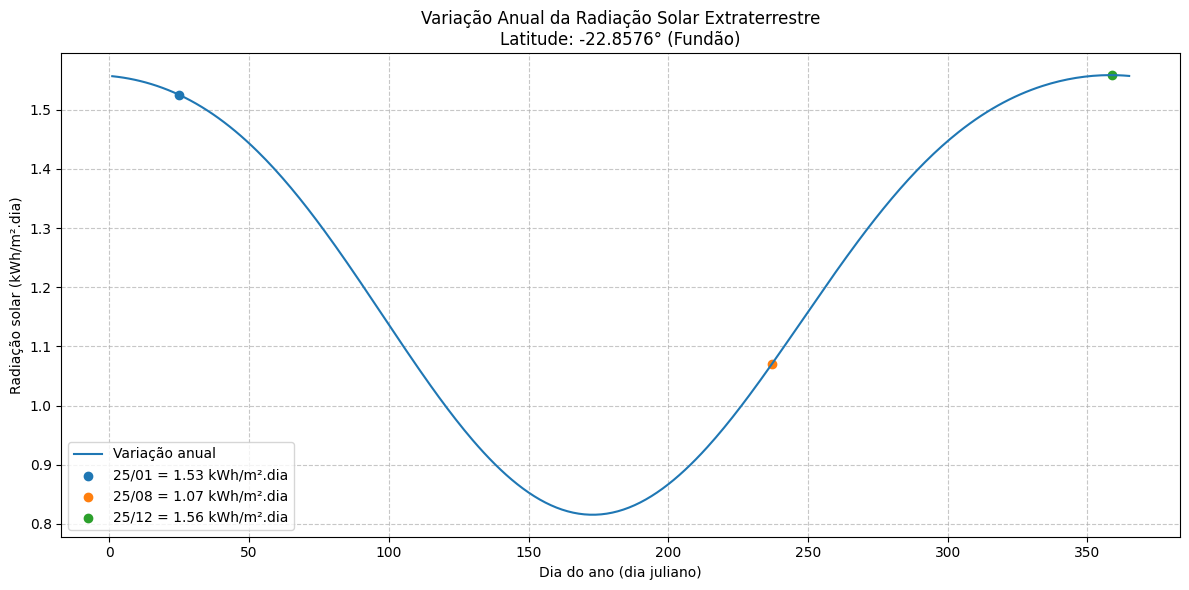

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constante solar média (em W/m²)
S = 1367

# Latitude do Fundão em graus (negativa porque está no hemisfério sul)
phi_deg = -22.8576 # °

# Dias do ano para cálculo
n1 = 25   # 25/01
n2 = 237  # 25/08
n3 = 359  # 25/12
n_values = [n1, n2, n3]

def calcular_parametros_solares(n):
    """Calcula os parâmetros solares para um dia específico do ano"""
    # --------------------------
    # 1. Cálculo do fator E0 (variação sazonal da constante solar)
    # Spencer (1971):
    # E0 = (r0/r)2 = 1,000110 + 0,034221 cosΓ + 0,001280 senΓ + 0,000719 cos2Γ + 0,000077 sen2Γ
    # Γ (ângulo diário, em radianos) = 2π(dn-1)/365 ----> !! já estamos lidando então com a energia diária !!
    # dn varia de 1 a 365
    # E0 = (r0/r)2 = 1 + 0,033 cos(2πdn/365)
    # --------------------------
    B_deg = (360 / 365) * (n - 1)
    B = np.deg2rad(B_deg)  # converter para radianos

    # Cálculo de E0 com a fórmula empírica de Spencer (1971)
    E0 = (1.000110 +
          0.034221 * np.cos(B) +
          0.00128 * np.sin(B) +
          0.000719 * np.cos(2 * B) +
          0.000077 * np.sin(2 * B))

    # --------------------------
    # 2. Cálculo da declinação solar (delta)
    # --------------------------
    # Declinação solar: ângulo entre os raios solares e o plano do equador : Cooper: δ = 23,45 sen(360/365*(dn+284))
    delta_deg = 23.45 * np.sin(np.deg2rad((360 / 365) * (n + 284)))
    delta = np.deg2rad(delta_deg)  # converter para radianos

    # --------------------------
    # 3. Cálculo do ângulo horário do nascer/pôr do Sol (omega_s)
    # --------------------------
    phi = np.deg2rad(phi_deg)  # converter latitude de ° para radianos

    # Fórmula do ângulo horário em radianos
    omega_s = np.arccos(-np.tan(phi) * np.tan(delta))

    # --------------------------
    # 4. Cálculo da radiação solar extraterrestre diária (I0)
    # --------------------------
    # Fórmula baseada na integral da irradiância ao longo do dia
    # Usa função seno e cosseno da latitude e declinação, e o ângulo horário

    # I0 em Wh/m².dia (o resultado está em termos de energia diária por metro quadrado)
    I0 = S * E0 * (omega_s * np.sin(phi) * np.sin(delta) +
                   np.cos(phi) * np.cos(delta) * np.sin(omega_s))

    # Converter de W para kWh se desejar:
    I0_kWh = I0 / 1000

    return {
        'Dia juliano': n,
        'E0': E0,
        'Declinação (graus)': delta_deg,
        'Ângulo horário (rad)': omega_s,
        'I0 (Wh/m².dia)': I0,
        'I0 (kWh/m².dia)': I0_kWh
    }

# Calcular para todas as datas
resultados = [calcular_parametros_solares(n) for n in n_values]

# Exibir resultados formatados
print("\nRESULTADOS DA RADIAÇÃO SOLAR EXTRATERRESTRE DIÁRIA\n")
print("="*70)
for res in resultados:
    data = {25: "25/01", 237: "25/08", 359: "25/12"}[res['Dia juliano']]
    print(f"\nData: {data} (Dia juliano: {res['Dia juliano']})")
    print("-"*50)
    print(f"Fator E0 (variação sazonal): {res['E0']:.6f}")
    print(f"Declinação solar: {res['Declinação (graus)']:.2f}°")
    print(f"Ângulo horário do nascer/pôr do sol: {res['Ângulo horário (rad)']:.4f} rad")
    print(f"\nRadiação extraterrestre diária:")
    print(f"{res['I0 (Wh/m².dia)']:.2f} Wh/m².dia")
    print(f"{res['I0 (kWh/m².dia)']:.4f} kWh/m².dia")
    print("="*70)

# teste - visualização
if input("\nDeseja visualizar a variação anual? (s/n): ").lower() == 's':
    dias_ano = np.arange(1, 366)
    I0_anual = [calcular_parametros_solares(d)['I0 (kWh/m².dia)'] for d in dias_ano]

    plt.figure(figsize=(12, 6))
    plt.plot(dias_ano, I0_anual, label='Variação anual')

    # Marcar as datas de interesse
    for n in n_values:
        res = calcular_parametros_solares(n)
        plt.scatter(n, res['I0 (kWh/m².dia)'],
                   label=f"{ {25: '25/01', 237: '25/08', 359: '25/12'}[n]} = {res['I0 (kWh/m².dia)']:.2f} kWh/m².dia")

    plt.title('Variação Anual da Radiação Solar Extraterrestre\nLatitude: -22.8576° (Fundão)')
    plt.xlabel('Dia do ano (dia juliano)')
    plt.ylabel('Radiação solar (kWh/m².dia)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

## 8) Idem, entre 07 e 08 horas e entre 15 e 16 horas.


RESULTADOS DA IRRADIÂNCIA SOLAR PARA INTERVALOS HORÁRIOS


Data: 25/01 (Dia 25) | Intervalo: 7-8h
-------------------------------------------------------------------------------------
Fator E0: 1.032510
Declinação solar: -19.26°
Ângulo horário nascer/pôr: ±1.7187 rad
Ângulo horário intervalo: -1.3090 a -1.0472 rad

Irradiância no intervalo:
-199.85 Wh/m²
4.675625 MJ/m²

Data: 25/01 (Dia 25) | Intervalo: 15-16h
-------------------------------------------------------------------------------------
Fator E0: 1.032510
Declinação solar: -19.26°
Ângulo horário nascer/pôr: ±1.7187 rad
Ângulo horário intervalo: 0.7854 a 1.0472 rad

Irradiância no intervalo:
1745.27 Wh/m²
6.668463 MJ/m²

Data: 25/08 (Dia 237) | Intervalo: 7-8h
-------------------------------------------------------------------------------------
Fator E0: 0.978267
Declinação solar: 10.33°
Ângulo horário nascer/pôr: ±1.4939 rad
Ângulo horário intervalo: -1.3090 a -1.0472 rad

Irradiância no intervalo:
-469.08 Wh/m²
2.660076 MJ/m²

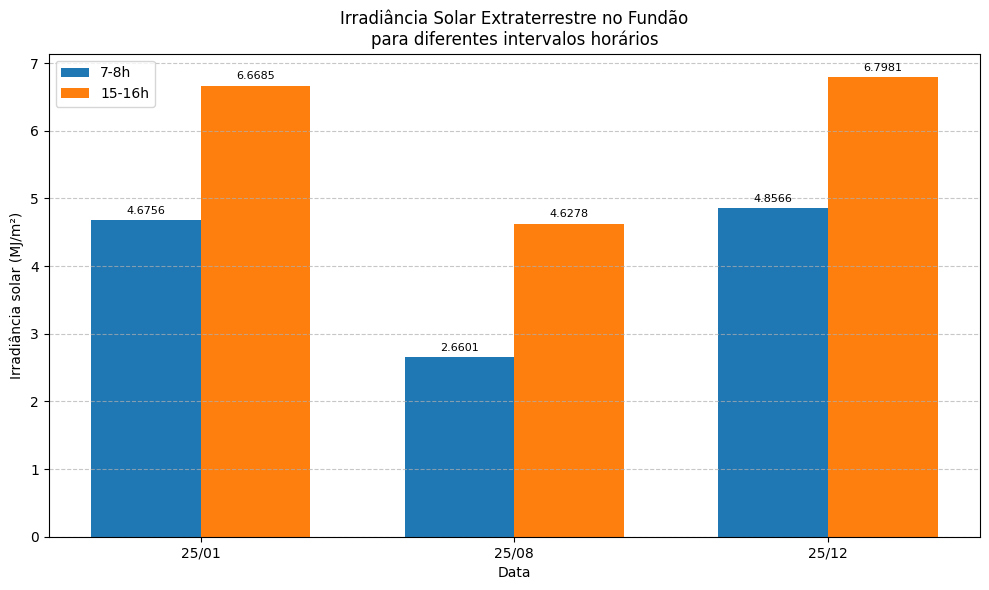

In [7]:
# OBS.: consideramos que E0 é cte ao longo do dia

# Constantes
S = 1367  # Constante solar (W/m²)
phi_deg = -22.8576  # Latitude do Fundão (°)
n_values = [25, 237, 359]  # Dias julianos: 25/01, 25/08, 25/12

def calcular_parametros_horarios(n, hora_inicio, hora_fim):
    """
    Calcula a irradiância solar para um intervalo horário específico

    Parâmetros:
    n -- dia juliano (1-365)
    hora_inicio -- hora de início do intervalo (0-24)
    hora_fim -- hora de término do intervalo (0-24)

    Retorna:
    Dicionário com todos os parâmetros calculados
    """
    # 1. Cálculo do fator E0 (Spencer 1971)
    B_deg = (360 / 365) * (n - 1)
    B = np.deg2rad(B_deg)
    E0 = (1.000110 + 0.034221 * np.cos(B) + 0.00128 * np.sin(B) +
          0.000719 * np.cos(2*B) + 0.000077 * np.sin(2*B))

    # 2. Cálculo da declinação solar (Cooper)
    delta_deg = 23.45 * np.sin(np.deg2rad((360/365) * (n + 284)))
    delta = np.deg2rad(delta_deg)

    # 3. Converter latitude para radianos
    phi = np.deg2rad(phi_deg)

    # 4. Ângulo horário do nascer/pôr do sol (omega_s)
    omega_s = np.arccos(-np.tan(phi) * np.tan(delta))

    # 5. Converter horas para ângulos horários
    # Relação: 1 hora = 15 graus, meio-dia = 0 rad
    omega_inicio = np.deg2rad((hora_inicio - 12) * 15)
    omega_fim = np.deg2rad((hora_fim - 12) * 15)

    # Limitar os ângulos horários pelo nascer/pôr do sol
    omega_inicio = max(-omega_s, min(omega_s, omega_inicio))
    omega_fim = max(-omega_s, min(omega_s, omega_fim))

    # 6. Calcular a irradiância para o intervalo horário (Wh/m²)
    # Integração da equação fornecida
    termo1 = (omega_fim - omega_inicio) * np.sin(phi) * np.sin(delta)
    termo2 = np.sin((omega_fim) - np.sin(omega_inicio)) * np.cos(phi) * np.cos(delta)

    I0_intervalo = (12/np.pi) * S * E0 * (termo1 + termo2)

    # 7. Converter para MJ/m² (como na equação 21)
    Ho_intervalo_MJ = (86400 * 1e-6 / np.pi) * S * E0 * (
        (omega_fim - omega_inicio) * np.sin(phi) * np.sin(delta) +
        (np.sin(omega_fim) - np.sin(omega_inicio)) * np.cos(phi) * np.cos(delta))

    return {
        'Dia juliano': n,
        'E0': E0,
        'Declinação (graus)': delta_deg,
        'Ângulo horário nascer (rad)': omega_s,
        'Intervalo horário': f"{hora_inicio}-{hora_fim}h",
        'Ângulo horário início (rad)': omega_inicio,
        'Ângulo horário fim (rad)': omega_fim,
        'I0 intervalo (Wh/m²)': I0_intervalo,
        'Ho intervalo (MJ/m²)': Ho_intervalo_MJ
    }


intervalos = [(7, 8), (15, 16)]

# Calcular para todas as combinações de datas e intervalos
resultados = []
for n in n_values:
    for intervalo in intervalos:
        resultados.append(calcular_parametros_horarios(n, *intervalo))

# Exibir resultados
print("\nRESULTADOS DA IRRADIÂNCIA SOLAR PARA INTERVALOS HORÁRIOS\n")
print("="*85)
for res in resultados:
    data = {25: "25/01", 237: "25/08", 359: "25/12"}[res['Dia juliano']]
    print(f"\nData: {data} (Dia {res['Dia juliano']}) | Intervalo: {res['Intervalo horário']}")
    print("-"*85)
    print(f"Fator E0: {res['E0']:.6f}")
    print(f"Declinação solar: {res['Declinação (graus)']:.2f}°")
    print(f"Ângulo horário nascer/pôr: ±{res['Ângulo horário nascer (rad)']:.4f} rad")
    print(f"Ângulo horário intervalo: {res['Ângulo horário início (rad)']:.4f} a {res['Ângulo horário fim (rad)']:.4f} rad")
    print(f"\nIrradiância no intervalo:")
    print(f"{res['I0 intervalo (Wh/m²)']:.2f} Wh/m²")
    print(f"{res['Ho intervalo (MJ/m²)']:.6f} MJ/m²")
    print("="*85)

# Visualização gráfica
if input("\nDeseja visualizar os resultados graficamente? (s/n): ").lower() == 's':
    # Preparar dados para o gráfico
    datas = ["25/01", "25/08", "25/12"]
    intervalos_str = ["7-8h", "15-16h"]
    valores_MJ = np.zeros((len(datas), len(intervalos_str)))

    for i, n in enumerate(n_values):
        for j, intervalo in enumerate(intervalos):
            for res in resultados:
                if res['Dia juliano'] == n and res['Intervalo horário'] == f"{intervalo[0]}-{intervalo[1]}h":
                    valores_MJ[i,j] = res['Ho intervalo (MJ/m²)']


    x = np.arange(len(datas))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, valores_MJ[:,0], width, label='7-8h')
    rects2 = ax.bar(x + width/2, valores_MJ[:,1], width, label='15-16h')

    ax.set_xlabel('Data')
    ax.set_ylabel('Irradiância solar (MJ/m²)')
    ax.set_title('Irradiância Solar Extraterrestre no Fundão\npara diferentes intervalos horários')
    ax.set_xticks(x)
    ax.set_xticklabels(datas)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)


    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

## 9) Estime a quantidade de radiação solar extraterrestre em cada dia do mês para o Fundão (Faça para todos os meses do ano). Calcule a média mensal. Compare o valor médio com os valores diários para encontrar o dia da declinação característica.

In [8]:
import math

# Dados básicos
latitude_fundao = -22.8576  # Latitude do Fundão em graus
constante_solar = 1367  # Constante solar em W/m²

# Função para calcular radiação diária (simplificada)
def calcular_radiacao_dia(dia_ano):
    """
    Calcula a radiação solar extraterrestre para um dia do ano
    dia_ano: número entre 1 (1º de janeiro) e 365 (31 de dezembro)
    Retorna a radiação em MJ/m².dia
    """

    # 1. Converter latitude para radianos
    lat_rad = math.radians(latitude_fundao)

    # 2. Calcular declinação solar (ângulo do Sol em relação ao equador)
    declinacao_graus = 23.45 * math.sin(math.radians(360/365 * (dia_ano + 284)))
    declinacao_rad = math.radians(declinacao_graus)

    # 3. Calcular ângulo horário do nascer do sol
    omega_s = math.acos(-math.tan(lat_rad) * math.tan(declinacao_rad))

    # 4. Calcular fator de correção da distância Terra-Sol
    E0 = 1 + 0.033 * math.cos(math.radians(360/365 * dia_ano))

    # 5. Calcular radiação diária (fórmula simplificada)
    termo1 = omega_s * math.sin(lat_rad) * math.sin(declinacao_rad)
    termo2 = math.cos(lat_rad) * math.cos(declinacao_rad) * math.sin(omega_s)
    radiacao = (86400/1000000) * (constante_solar/math.pi) * E0 * (termo1 + termo2)

    return radiacao, declinacao_graus

# Lista de meses e seus dias
meses = [
    ("Janeiro", 31),
    ("Fevereiro", 28),  # Ano não bissexto
    ("Março", 31),
    ("Abril", 30),
    ("Maio", 31),
    ("Junho", 30),
    ("Julho", 31),
    ("Agosto", 31),
    ("Setembro", 30),
    ("Outubro", 31),
    ("Novembro", 30),
    ("Dezembro", 31)
]

# Calcular para cada mês
print("=== RADIAÇÃO SOLAR MÉDIA MENSUAL NO FUNDÃO ===")
print("Mês       | Radiação Média | Dia Característico | Radiação no Dia")

dia_atual = 1
for mes, dias_mes in meses:
    radiacao_total = 0
    melhor_dia = 0
    menor_diferenca = 1000  # Valor inicial alto

    # Calcular para cada dia do mês
    for dia_mes in range(1, dias_mes + 1):
        radiacao, declinacao = calcular_radiacao_dia(dia_atual)
        radiacao_total += radiacao
        dia_atual += 1

    # Média mensal
    media_mensal = radiacao_total / dias_mes

    # Voltar e encontrar o dia mais próximo da média
    dia_atual -= dias_mes  # Voltar ao início do mês
    for dia_mes in range(1, dias_mes + 1):
        radiacao, _ = calcular_radiacao_dia(dia_atual)
        diferenca = abs(radiacao - media_mensal)

        if diferenca < menor_diferenca:
            menor_diferenca = diferenca
            melhor_dia = dia_mes
            melhor_radiacao = radiacao

        dia_atual += 1

    # Mostrar resultados
    print(f"{mes[:7]:<9} | {media_mensal:7.2f} MJ/m² | {melhor_dia:2} de {mes[:3]} | {melhor_radiacao:7.2f} MJ/m²")

# Exemplo de cálculo para um dia específico (25 de janeiro = dia 25)
print("\nExemplo para 25 de janeiro:")
rad, decl = calcular_radiacao_dia(25)
print(f"Radiação: {rad:.2f} MJ/m²")
print(f"Declinação solar: {decl:.2f} graus")

=== RADIAÇÃO SOLAR MÉDIA MENSUAL NO FUNDÃO ===
Mês       | Radiação Média | Dia Característico | Radiação no Dia
Janeiro   |   42.23 MJ/m² | 18 de Jan |   42.22 MJ/m²
Feverei   |   40.04 MJ/m² | 15 de Fev |   40.06 MJ/m²
Março     |   35.84 MJ/m² | 16 de Mar |   35.91 MJ/m²
Abril     |   30.20 MJ/m² | 15 de Abr |   30.27 MJ/m²
Maio      |   25.14 MJ/m² | 15 de Mai |   25.16 MJ/m²
Junho     |   22.66 MJ/m² | 11 de Jun |   22.67 MJ/m²
Julho     |   23.71 MJ/m² | 17 de Jul |   23.67 MJ/m²
Agosto    |   27.92 MJ/m² | 16 de Ago |   27.86 MJ/m²
Setembr   |   33.50 MJ/m² | 15 de Set |   33.44 MJ/m²
Outubro   |   38.42 MJ/m² | 15 de Out |   38.38 MJ/m²
Novembr   |   41.50 MJ/m² | 14 de Nov |   41.47 MJ/m²
Dezembr   |   42.68 MJ/m² | 12 de Dez |   42.69 MJ/m²

Exemplo para 25 de janeiro:
Radiação: 41.85 MJ/m²
Declinação solar: -19.26 graus


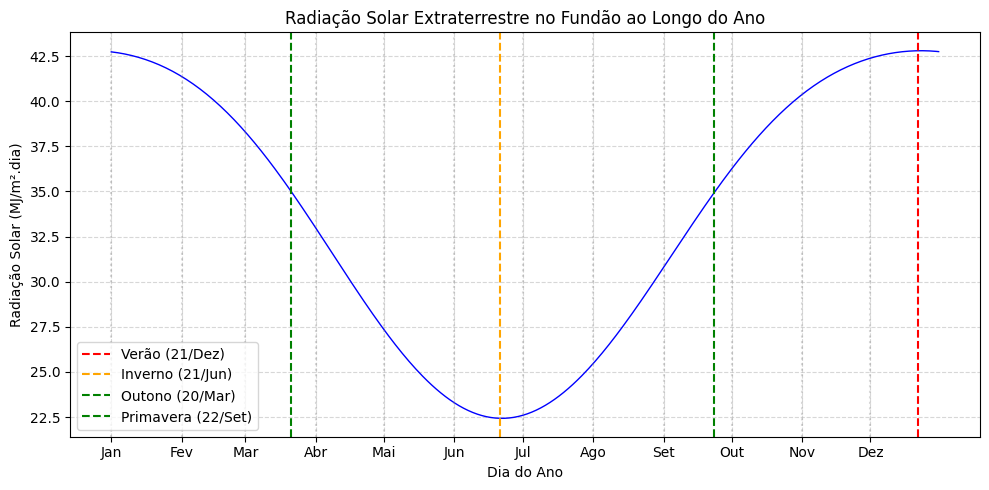


Valores em datas importantes:
1° de Janeiro: 42.73 MJ/m².dia
21 de Junho (Solstício de Inverno): 22.43 MJ/m².dia
22 de Setembro (Equinócio de Primavera): 34.89 MJ/m².dia
21 de Dezembro (Solstício de Verão): 42.79 MJ/m².dia


In [9]:
import math
import matplotlib.pyplot as plt

# Dados básicos
latitude_fundao = -22.8576  # Latitude do Fundão em graus
constante_solar = 1367      # Constante solar em W/m²

# Função simplificada para calcular radiação diária
def calcular_radiacao(dia_ano):
    """Calcula a radiação solar para um dia do ano (1-365)"""

    # Converter latitude para radianos
    lat_rad = math.radians(latitude_fundao)

    # Calcular declinação solar (posição do Sol)
    declinacao = math.radians(23.45 * math.sin(math.radians(360/365 * (dia_ano + 284))))

    # Calcular quando o sol nasce/se põe
    omega_s = math.acos(-math.tan(lat_rad) * math.tan(declinacao))

    # Fator de correção da distância Terra-Sol
    E0 = 1 + 0.033 * math.cos(math.radians(360/365 * dia_ano))

    # Cálculo final da radiação (convertendo para MJ/m².dia)
    termo1 = omega_s * math.sin(lat_rad) * math.sin(declinacao)
    termo2 = math.cos(lat_rad) * math.cos(declinacao) * math.sin(omega_s)
    radiacao = (24 * 3600 / 1000000) * (constante_solar/math.pi) * E0 * (termo1 + termo2)

    return radiacao

# Preparar listas para o gráfico
dias = []
radiacao = []

# Calcular para todos os dias do ano
for dia in range(1, 366):
    dias.append(dia)
    radiacao.append(calcular_radiacao(dia))

# Criar o gráfico
plt.figure(figsize=(10, 5))
plt.plot(dias, radiacao, color='blue', linewidth=1)

# Destacar meses específicos
meses = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
               'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Adicionar linhas verticais para cada mês
for mes in meses:
    plt.axvline(x=mes, color='gray', linestyle=':', alpha=0.3)

# Configurar o gráfico
plt.title('Radiação Solar Extraterrestre no Fundão ao Longo do Ano')
plt.xlabel('Dia do Ano')
plt.ylabel('Radiação Solar (MJ/m².dia)')
plt.grid(True, linestyle='--', alpha=0.5)

# Adicionar nomes dos meses no eixo x
plt.xticks(meses, nomes_meses)

# Destacar os solstícios e equinócios
plt.axvline(x=356, color='red', linestyle='--', label='Verão (21/Dez)')
plt.axvline(x=172, color='orange', linestyle='--', label='Inverno (21/Jun)')
plt.axvline(x=80, color='green', linestyle='--', label='Outono (20/Mar)')
plt.axvline(x=266, color='green', linestyle='--', label='Primavera (22/Set)')

plt.legend()
plt.tight_layout()
plt.show()

# Mostrar valores específicos
print("\nValores em datas importantes:")
print(f"1° de Janeiro: {radiacao[0]:.2f} MJ/m².dia")
print(f"21 de Junho (Solstício de Inverno): {radiacao[171]:.2f} MJ/m².dia")
print(f"22 de Setembro (Equinócio de Primavera): {radiacao[265]:.2f} MJ/m².dia")
print(f"21 de Dezembro (Solstício de Verão): {radiacao[355]:.2f} MJ/m².dia")